In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

booking = pd.read_csv('/kaggle/input/bookings/bookings.csv', sep=';')

In [2]:
booking

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,2,0.0,0,BB,BEL,A,A,Transient,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,3,0.0,0,BB,FRA,E,E,Transient,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,DEU,D,D,Transient,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2017-09-07


In [3]:
booking.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

In [4]:
booking.shape

(119390, 21)

In [5]:
# prepare data for comfortable work with them - rename columns
bookings = booking.rename(str.lower, axis=1)

In [6]:
def replace_spaces(x):
    return x.replace(' ', '_')

In [7]:
bookings = bookings.rename(replace_spaces, axis=1)
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [8]:
# top 5 countries with successful booking

bookings.groupby('country').aggregate({'is_canceled': 'sum'}).sort_values('is_canceled', ascending=False)


,is_canceled
country,
PRT,27519
GBR,2453
ESP,2177
FRA,1934
ITA,1333
...,...
DJI,0
SDN,0
CYM,0


In [9]:
# What mean number of reserved nights for booking in different hotel's types
bookings['all_nights'] = bookings.stays_in_weekend_nights + bookings.stays_in_week_nights
bookings.groupby('hotel').agg({'all_nights': 'mean'})


,all_nights
hotel,
City Hotel,2.978142
Resort Hotel,4.318547


In [10]:
# Sometimes type of assigned room differs (assigned_room_type) from inintial type
# of reserved room (reserved_room_type) due to overbooking
# how much times does this occure in this dstaset?

different_rooms_cases = bookings.query('reserved_room_type != assigned_room_type').shape[0]
different_rooms_cases

14917

In [11]:
# wich month was more successful for booking in 2016?
# does it changed in 2017? 


In [12]:
bookings_of_2016_best_month = bookings.query('arrival_date_year == 2016').arrival_date_month.value_counts()
bookings_of_2016_best_month

October      6203
May          5478
April        5428
September    5394
June         5292
August       5063
March        4824
July         4572
November     4454
February     3891
December     3860
January      2248
Name: arrival_date_month, dtype: int64

In [13]:
bookings_of_2017_best_month = bookings.query('arrival_date_year == 2017').arrival_date_month.value_counts()
bookings_of_2017_best_month

May         6313
April       5661
June        5647
July        5313
March       4970
August      4925
February    4177
January     3681
Name: arrival_date_month, dtype: int64

In [14]:
# group data by years and check in which month there was max of cancellations for City Hotel types in each year.

In [15]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,all_nights
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03,2


In [16]:
bookings.query('hotel == "City Hotel" and is_canceled == 1').groupby(['arrival_date_year', 'arrival_date_month']).agg({'is_canceled': 'sum'})

is_canceled
arrival_date_year arrival_date_month             
2015              August                     1232
                  December                    668
                  July                        939
                  November                    301
                  October                    1321
                  September                  1543
2016              April                      1539
                  August                     1247
                  December                   1072
                  February                    930
                  January                     438
                  July                       1043
                  June                       1720
                  March                      1108
                  May                        1436
                  November                   1360
                  October                    1947
                  September                  1567
2017              April                      1926
                  August                     1123
                  February                    971
                  January                    1044
                  July                       1324
                  June                       1808
                  March                      1278
                  May                        2217

In [17]:
# whatis max mean among mean for adults, children и babies
bookings.adults.mean()


1.8564033838679956

In [18]:
bookings.children.mean()

0.10388990333874994

In [19]:
bookings.babies.mean()

0.007948739425412514

In [20]:
#  create column total_kids, join there children and babies. Which type of hotels is more popular for families with children.


In [21]:
bookings['total_kids'] = bookings.children + bookings.babies

In [22]:
bookings.groupby('hotel').total_kids.mean()

hotel
City Hotel      0.096311
Resort Hotel    0.142586
Name: total_kids, dtype: float64

In [23]:
# create variable has_kids, which turns True if client pointed out one or more children during booking (total_kids),
# else – False. Count churn rate - amount of cancelled users to all users, in which group this caracteristics is higher.

In [24]:
bookings['has_kids'] = bookings['total_kids'] != 0

In [25]:
bookings.has_kids

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: has_kids, Length: 119390, dtype: bool

In [26]:
churn_rate = bookings.query('is_canceled == 1').shape[0]/(bookings.shape[0])
churn_rate

0.37041628277075134

In [27]:
churn_rate_without_children = bookings.query('is_canceled == 1 and has_kids == False').shape[0]/(bookings.query('has_kids == False').shape[0])*100
churn_rate_without_children

37.219001581042036

In [28]:
churn_rate_with_children = bookings.query('is_canceled == 1 and has_kids == True').shape[0]/(bookings.query('has_kids == True').shape[0])*100
churn_rate_with_children

34.950728363324764

In [29]:
users_activity = pd.read_csv('../input/user-activities/user_data.csv')

In [30]:
logs = pd.read_csv('../input/logs-for-project/logs.csv')

In [31]:
users_activity.columns

Index(['client', 'premium', 'age'], dtype='object')

In [32]:
logs['date'] = pd.to_datetime(logs.time, unit='s')
logs.dtypes

client               int64
success               bool
platform            object
time                 int64
date        datetime64[ns]
dtype: object

<AxesSubplot:>

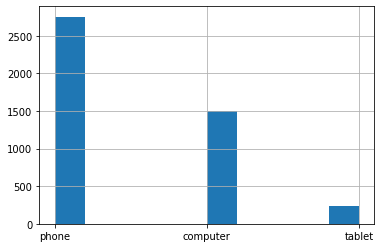

In [33]:
logs.platform.hist()

In [34]:
# which client made max of succefull operations?
logs

,client,success,platform,time,date
0,40177,True,phone,1585412212,2020-03-28 16:16:52
1,61468,True,phone,1585425658,2020-03-28 20:00:58
2,35604,False,phone,1585459894,2020-03-29 05:31:34
3,9961,True,phone,1585400189,2020-03-28 12:56:29
4,10931,True,computer,1585468629,2020-03-29 07:57:09
...,...,...,...,...,...
4495,64496,False,computer,1585459072,2020-03-29 05:17:52
4496,73299,True,phone,1585458370,2020-03-29 05:06:10
4497,8967,True,phone,1585465121,2020-03-29 06:58:41
4498,52880,False,phone,1585455362,2020-03-29 04:16:02


In [35]:
logs.query('success == True').groupby('client').agg({'success' : 'sum'}).sort_values('success')

,success
client,
40,1
65936,1
66064,1
66245,1
66266,1
...,...
28719,41
52870,41
36165,41


In [36]:
# which platform provides more successfull operationa?

In [37]:
logs.query('success == True').groupby('platform').agg({'success' : 'sum'}).sort_values('platform')

,success
platform,
computer,1090
phone,2019
tablet,180


In [38]:
# which platform do preminum clients prefer?

In [39]:
premium_users = users_activity.query('premium == True')
premium_users

,client,premium,age
22,74867,True,27
23,49379,True,25
24,88203,True,35
29,32603,True,20
51,53182,True,24
...,...,...,...
2928,52373,True,36
2930,13688,True,66
2934,40643,True,22
2947,53774,True,50


In [40]:
logs_for_premium = logs.query('client in @premium_users.client')
logs_for_premium

,client,success,platform,time,date
2,35604,False,phone,1585459894,2020-03-29 05:31:34
10,11983,True,phone,1585459511,2020-03-29 05:25:11
17,99308,True,computer,1585409409,2020-03-28 15:30:09
27,49625,False,phone,1585447789,2020-03-29 02:09:49
33,53978,True,computer,1585408637,2020-03-28 15:17:17
...,...,...,...,...,...
4402,20278,True,computer,1585456706,2020-03-29 04:38:26
4436,78455,True,phone,1585459854,2020-03-29 05:30:54
4438,57026,True,computer,1585438120,2020-03-28 23:28:40
4467,2864,True,phone,1585459818,2020-03-29 05:30:18


In [41]:
logs_for_premium.client.nunique()

406

In [42]:
logs_for_premium.groupby('platform').agg({'client': 'count'})

,client
platform,
computer,150
phone,246
tablet,24


In [43]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


In [44]:
users_activity.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


<AxesSubplot:xlabel='age', ylabel='Count'>

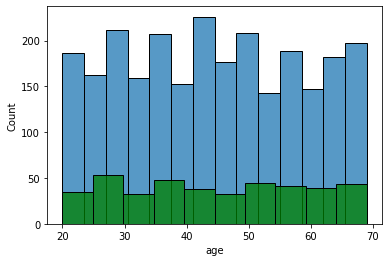

In [45]:
fig, ax = plt.subplots()
sns.histplot(data=users_activity.query('premium == False').age, ax=ax)
sns.histplot(data=users_activity.query('premium == True').age, ax=ax, color='green')

In [46]:
# Постройте график распределения числа успешных операций
logs.head()

,client,success,platform,time,date
0,40177,True,phone,1585412212,2020-03-28 16:16:52
1,61468,True,phone,1585425658,2020-03-28 20:00:58
2,35604,False,phone,1585459894,2020-03-29 05:31:34
3,9961,True,phone,1585400189,2020-03-28 12:56:29
4,10931,True,computer,1585468629,2020-03-29 07:57:09


In [47]:
unit_table = logs.merge(users_activity, how='outer', on='client')
unit_table


,client,success,platform,time,date,premium,age
0,40177,True,phone,1585412212,2020-03-28 16:16:52,NaN,NaN
1,61468,True,phone,1585425658,2020-03-28 20:00:58,False,25.0
2,61468,True,computer,1585460504,2020-03-29 05:41:44,False,25.0
3,61468,True,computer,1585430291,2020-03-28 21:18:11,False,25.0
4,61468,True,computer,1585444317,2020-03-29 01:11:57,False,25.0
...,...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,2020-03-29 05:17:52,False,66.0
4496,73299,True,phone,1585458370,2020-03-29 05:06:10,NaN,NaN
4497,8967,True,phone,1585465121,2020-03-29 06:58:41,False,33.0
4498,52880,False,phone,1585455362,2020-03-29 04:16:02,NaN,NaN


In [48]:
computer_success_operations = unit_table.query('platform == "computer" and success == True')
computer_success_operations[['success', 'age']]

,success,age
2,True,25.0
3,True,25.0
4,True,25.0
8,True,25.0
12,True,25.0
...,...,...
4484,True,NaN
4488,True,NaN
4490,True,46.0
4492,True,45.0


<AxesSubplot:xlabel='age', ylabel='count'>

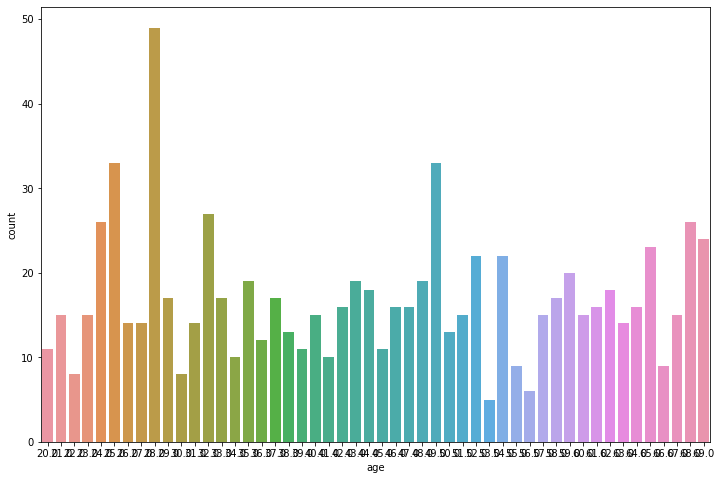

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(data=computer_success_operations, x='age')